### Aplicação do efeito de aberração cromática linear 

In [13]:
# Importa as dependências
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

In [14]:
# Extrai algumas informações da imagem, tipo o L C e P :)
image = np.array(Image.open("architecture.jpg"))[:, :, :3]
l, c, p = image.shape

# Define os fatores
# de filtragem 
fator_r = 30
fator_g = 38
fator_b = 45

# Aplica o efeito de defasagem dos 
# pixels coloridos nas bordas da imagem
chromatic = np.zeros(shape=(l, c, p), dtype=np.uint8)
for i in range(l):
    for j in range(c):

        # Calcula a nova posição do pixel com 
        # base na regra de defasagem na borda
        pos_x_r = int(np.floor((i - (l / 2)) / fator_r))
        pos_y_r = int(np.floor((j - (c / 2)) / fator_r))
        pos_x_g = int(np.floor((i - (l / 2)) / fator_g))
        pos_y_g = int(np.floor((j - (c / 2)) / fator_g))
        pos_x_b = int(np.floor((i - (l / 2)) / fator_b))
        pos_y_b = int(np.floor((j - (c / 2)) / fator_b))

        try:

            # Extrai valores de 
            # luminosidade da imagem
            r = image[i, j, 0]
            g = image[i, j, 1]
            b = image[i, j, 2]

            # Calcula o novo valor do pixel da imagem 
            # com base distância do centro e luminância
            chromatic[i - pos_x_r, j - pos_y_r, 0] = r
            chromatic[i - pos_x_g, j - pos_y_g, 1] = g
            chromatic[i - pos_x_b, j - pos_y_b, 2] = b
  
        except: pass

        # Aplica um filtro para eliminar valores
        # nos quais não foram dados valores
        if chromatic[i, j, 0] == 0: chromatic[i, j, 0] = (image[i, j, 0])
        if chromatic[i, j, 1] == 0: chromatic[i, j, 1] = (image[i, j, 1])
        if chromatic[i, j, 2] == 0: chromatic[i, j, 2] = (image[i, j, 2])


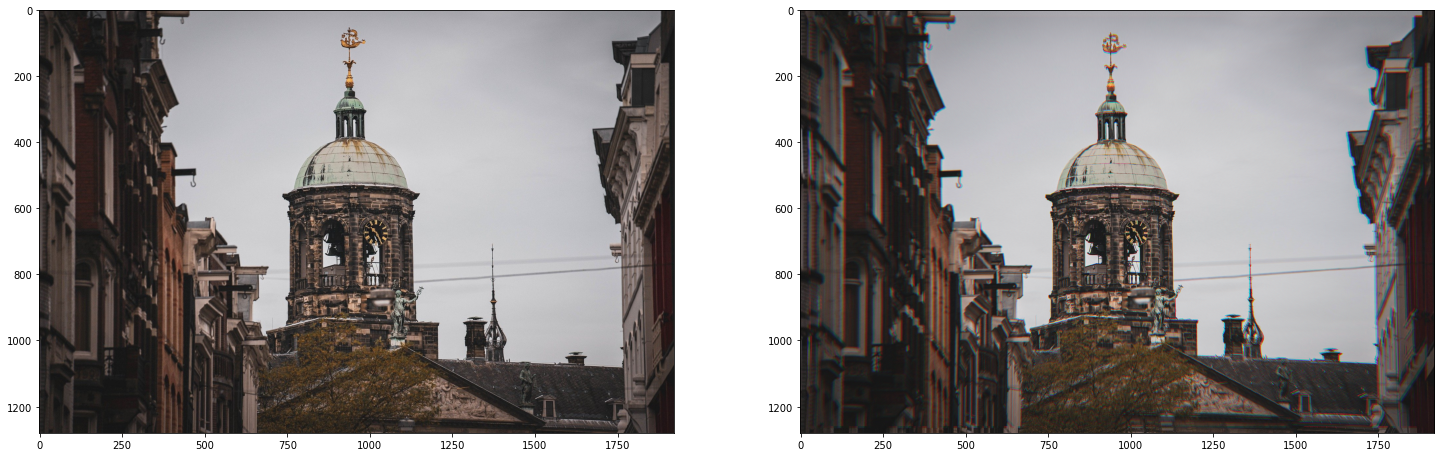

In [15]:
# Mostra os resultados 
# da conversão
plt.figure(figsize=(25, 25))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.subplot(1, 2, 2)
plt.imshow(chromatic, cmap='gray')

# Salva a figura
# plt.savefig("chroma.png")

In [16]:
# Converte a imagem
img_bin = Image.fromarray(chromatic)

# Converte a imagem para RGB e salva
img_bin.convert('RGB').save('chroma_4.png')